In [1]:
#Project: 210 Capstone
#Author: Alexandre C. Baude
#Data: 06/09/2022

#Import Block
import os 
import pandas as pd
import copy
import regex as re
from collections import Counter
import enchant
import matplotlib.pyplot as plt 

#Grabbing files
files = []  
file_name = []
path = r'C:\Users\alebo\Desktop\Berkeley\210\Data\Streamer_Data'  #CHANGE FOR YOUR FILEPATH

with os.scandir(path) as entries:
    for entry in entries:
        files.append(entry.name)

for i in range(0, len(files)):  
    file_name.append(files[i])
    files[i] = path + "/" + files[i]

print(f'There are {len(files)} file(s) in the sub-folder.')

There are 7 file(s) in the sub-folder.


In [6]:
streamer_df = pd.DataFrame

for i in range(len(files)): #For every file:
   # print(files[i])
    pof = files[i] #Grab the path of the file
    print(pof) #Print to double check
    csv = pd.read_csv(pof) 
    
    
    if i == 0: 
        streamer_df = copy.deepcopy(csv) #if looking at the first file, just make it the baseline
    else:
        streamer_df = streamer_df.append(csv, ignore_index=True) #otherwise, append (union) the next log to the bottom
    
    print("The current size of the Streamer Union is:", streamer_df.shape)

streamer_df #Unionized Version of the files

#streamer_df.to_csv('streamer_data.csv')      #Code to save the output as a .csv



C:\Users\alebo\Desktop\Berkeley\210\Data\Streamer_Data/1streamer_data.csv
The current size of the Streamer Union is: (1381, 12)
C:\Users\alebo\Desktop\Berkeley\210\Data\Streamer_Data/asmongold.csv
The current size of the Streamer Union is: (5458, 12)
C:\Users\alebo\Desktop\Berkeley\210\Data\Streamer_Data/boxbox.csv
The current size of the Streamer Union is: (5961, 12)
C:\Users\alebo\Desktop\Berkeley\210\Data\Streamer_Data/disguisedtoast.csv
The current size of the Streamer Union is: (6260, 13)
C:\Users\alebo\Desktop\Berkeley\210\Data\Streamer_Data/k3soju.csv
The current size of the Streamer Union is: (7958, 13)
C:\Users\alebo\Desktop\Berkeley\210\Data\Streamer_Data/kitboga.csv
The current size of the Streamer Union is: (9393, 13)
C:\Users\alebo\Desktop\Berkeley\210\Data\Streamer_Data/thebausffs.csv
The current size of the Streamer Union is: (12329, 14)


,Unnamed: 0,text,username,timestamp,message_id,channel_id,stream_id,unique_id,sentiment_a,sentiment_g,sentiment_v,sentiment_anders,,Unnamed: 11
0,0.0,I got sick in December and am only just now fu...,spooomm,"2022-06-09 15:56:52,388",1,A,1,1A1,-1.0,-1,NaN,NaN,NaN,NaN
1,1.0,!rp,socio1319,"2022-06-09 15:56:52,527",2,A,1,2A1,NaN,0,NaN,NaN,NaN,NaN
2,2.0,"= RP Stats = | Current Amount: 14,956 RP || 32...",nightbot,"2022-06-09 15:56:54,741",3,A,1,3A1,NaN,0,NaN,NaN,NaN,NaN
3,3.0,@Pr11me_ You buy i eat,tjgruehs,"2022-06-09 15:56:58,572",4,A,1,4A1,0.0,0,NaN,NaN,NaN,NaN
4,4.0,how many days are you staying in the hospital ...,i7amanyq8,"2022-06-09 15:57:02,695",5,A,1,5A1,0.0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12324,NaN,FROZEN LUL FROZEN LUL FROZEN LUL FROZEN LUL...,leocuantico,"2022-06-14 09:10:27,198",2932,E,1,29320.0,NaN,NaN,NaN,NaN,NaN,NaN
12325,NaN,YEP,imarnru,"2022-06-14 09:10:27,352",2933,E,1,29330.0,NaN,NaN,NaN,NaN,NaN,NaN
12326,NaN,bays,mvbmvp,"2022-06-14 09:10:27,430",2934,E,1,29340.0,NaN,NaN,NaN,NaN,NaN,NaN
12327,NaN,can we get a bet,dopedsilicon,"2022-06-14 09:10:28,056",2935,E,1,29350.0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
def tokenize(row):
    '''
    Function to tokenize the text messages
    '''
    try: 
        s = row['text'] #grabbing the text
        s = re.sub("[^\w\s]", "", s) #removing punctuation
        l = s.lower().split() #tokenizing and lowering
        return l
    except:
        return ["N/A"]





def sentiment(row):
    if 'pog' in df['text'].lower() and len(df['text']) == 1 :
        return 1
    
    if 'sadge' in df['text'].lower() and len(df['text']) == 1 :
        return -1

    if 'kekw' in df['text']:
        return 1


streamer_df['Tokens'] = streamer_df.apply(tokenize, axis = 1) #applying the function
streamer_df
    

,Unnamed: 0,text,username,timestamp,message_id,channel_id,stream_id,unique_id,sentiment_a,sentiment_g,sentiment_v,sentiment_anders,,Unnamed: 11,Tokens
0,0.0,I got sick in December and am only just now fu...,spooomm,"2022-06-09 15:56:52,388",1,A,1,1A1,-1.0,-1,NaN,NaN,NaN,NaN,"[i, got, sick, in, december, and, am, only, ju..."
1,1.0,!rp,socio1319,"2022-06-09 15:56:52,527",2,A,1,2A1,NaN,0,NaN,NaN,NaN,NaN,[rp]
2,2.0,"= RP Stats = | Current Amount: 14,956 RP || 32...",nightbot,"2022-06-09 15:56:54,741",3,A,1,3A1,NaN,0,NaN,NaN,NaN,NaN,"[rp, stats, current, amount, 14956, rp, 323, r..."
3,3.0,@Pr11me_ You buy i eat,tjgruehs,"2022-06-09 15:56:58,572",4,A,1,4A1,0.0,0,NaN,NaN,NaN,NaN,"[pr11me_, you, buy, i, eat]"
4,4.0,how many days are you staying in the hospital ...,i7amanyq8,"2022-06-09 15:57:02,695",5,A,1,5A1,0.0,0,NaN,NaN,NaN,NaN,"[how, many, days, are, you, staying, in, the, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12324,NaN,FROZEN LUL FROZEN LUL FROZEN LUL FROZEN LUL...,leocuantico,"2022-06-14 09:10:27,198",2932,E,1,29320.0,NaN,NaN,NaN,NaN,NaN,NaN,"[frozen, lul, frozen, lul, frozen, lul, frozen..."
12325,NaN,YEP,imarnru,"2022-06-14 09:10:27,352",2933,E,1,29330.0,NaN,NaN,NaN,NaN,NaN,NaN,[yep]
12326,NaN,bays,mvbmvp,"2022-06-14 09:10:27,430",2934,E,1,29340.0,NaN,NaN,NaN,NaN,NaN,NaN,[bays]
12327,NaN,can we get a bet,dopedsilicon,"2022-06-14 09:10:28,056",2935,E,1,29350.0,NaN,NaN,NaN,NaN,NaN,NaN,"[can, we, get, a, bet]"


In [8]:
#EDA
tokens = streamer_df['Tokens'] #list of messages tokenized (split) 
all_tokens = tokens.sum() #list of all messages together
eng_dict = enchant.Dict("en_US") #US Dict
cnt_all = Counter() #Counter for all words
real_word_cnt = Counter() #Counter for real words
fake_word_cnt = Counter() #Counter for fake words (meme words?)

for text in all_tokens: #for every word in the messages
    cnt_all[text] += 1 #for every word, increase its frequency

    if eng_dict.check(text): 
        real_word_cnt[text] += 1 #for every real word, increase its frequency
    else:
        fake_word_cnt[text] += 1 #for every fake word, increase its frequency


word_freq_all = pd.DataFrame(cnt_all.most_common(1883), columns=['words', 'count'])
word_freq_real = pd.DataFrame(real_word_cnt.most_common(1250), columns=['words', 'count'])
word_freq_fake = pd.DataFrame(fake_word_cnt.most_common(633), columns=['words', 'count'])

word_freq_all_top_30 = pd.DataFrame(cnt_all.most_common(30), columns=['words', 'count'])
word_freq_real_top_30 = pd.DataFrame(real_word_cnt.most_common(30), columns=['words', 'count'])
word_freq_fake_top_30 = pd.DataFrame(fake_word_cnt.most_common(30), columns=['words', 'count'])



In [9]:
#Top 5 for each table
print(word_freq_all.head(5), '\n')
print(word_freq_fake.head(5), '\n')
print(word_freq_real.head(5), '\n')

  words  count
0   the   2103
1     i   1208
2    in   1186
3    to    850
4  chat    752 

          words  count
0          sion    615
1      partyhat    482
2  feelsgoodman    479
3     lolsinged    372
4          kekw    361 

  words  count
0   the   2103
1     i   1208
2    in   1186
3    to    850
4  chat    752 



<AxesSubplot:title={'center':'Word Frequency for Fake words'}, xlabel='Words', ylabel='Counts'>

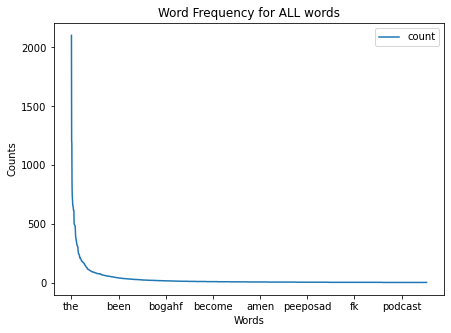

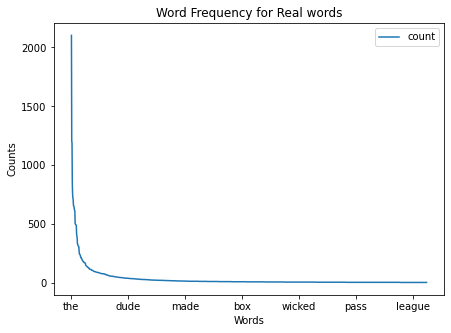

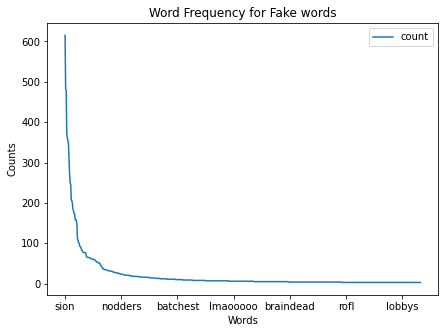

In [10]:
#Frequency Graphs & Tables

word_freq_all.plot(x= 'words', y = 'count', kind = 'line', xlabel = 'Words', ylabel = 'Counts', title = 'Word Frequency for ALL words', figsize = (7, 5))
word_freq_real.plot(x= 'words', y = 'count', kind = 'line', xlabel = 'Words', ylabel = 'Counts', title = 'Word Frequency for Real words', figsize = (7, 5))
word_freq_fake.plot(x= 'words', y = 'count', kind = 'line', xlabel = 'Words', ylabel = 'Counts', title = 'Word Frequency for Fake words', figsize = (7, 5))

#####
Not very helpful... Try to look at top 30

<AxesSubplot:title={'center':'Word Frequency for Fake words Top 30'}, xlabel='Words', ylabel='Counts'>

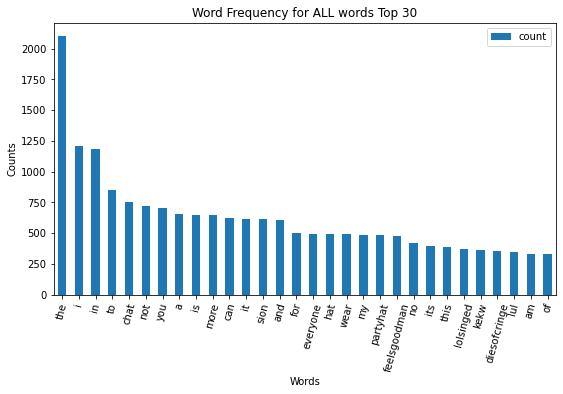

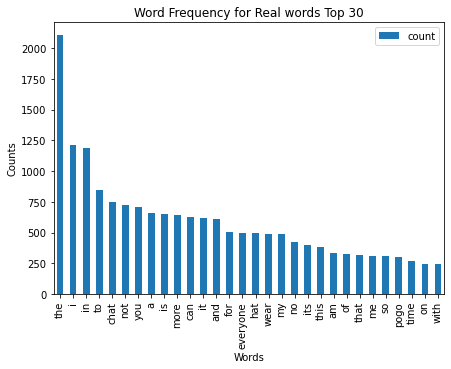

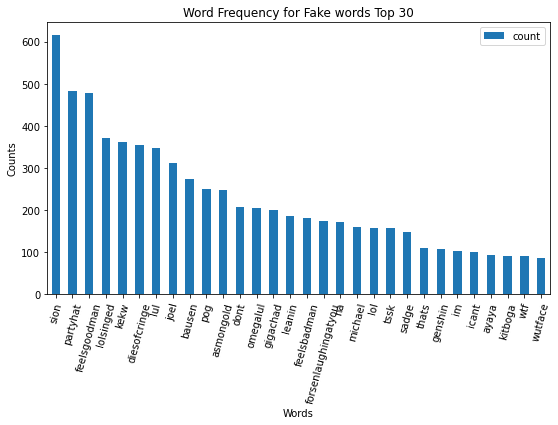

In [60]:
#Frequency top 30 

word_freq_all_top_30.plot(x= 'words', y = 'count', kind = 'bar', xlabel = 'Words', ylabel = 'Counts', title = 'Word Frequency for ALL words Top 30', rot=75, figsize = (9, 5))
word_freq_real_top_30.plot(x= 'words', y = 'count', kind = 'bar', xlabel = 'Words', ylabel = 'Counts', title = 'Word Frequency for Real words Top 30', figsize = (7, 5))
word_freq_fake_top_30.plot(x= 'words', y = 'count', kind = 'bar', xlabel = 'Words', ylabel = 'Counts', title = 'Word Frequency for Fake words Top 30', rot=75, figsize = (9, 5))


In [25]:
#Real vs Fake
print(f"There are {len(streamer_df) :,} total messages which left us with {word_freq_all['count'].sum() :,} words.\nNumber of real words is: {word_freq_real['count'].sum() :,} or {(word_freq_real['count'].sum()/word_freq_all['count'].sum()) * 100 :.2f}%\nNumber of fake words is: {word_freq_fake['count'].sum() :,} or {(word_freq_fake['count'].sum()/word_freq_all['count'].sum()) * 100 :.2f}%")

print(f"The average length of a message across all streams is: {(tokens.str.len()).mean() :.2f}")

There are 12,329 total messages which left us with 56,541 words.
Number of real words is: 42,808 or 75.71%
Number of fake words is: 13,733 or 24.29%
The average length of a message across all streams is: 5.10
